In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)
import progressbar

1.2.0


### Load of the test data

In [2]:
from process import loaddata
regr_data = loaddata("../data/regression/100-high-ene.csv")
class_data = loaddata("../data/classifier/100-high-ene.csv")

In [3]:
np.random.shuffle(class_data)
yc_test = class_data[:,0]
xc_test = class_data[:,1:]

In [4]:
np.random.shuffle(regr_data)
yr_test = regr_data[:,-3:]
xr_test = regr_data[:,:6]

In [5]:
xc_test.shape

(72254, 10)

In [6]:
xr_test.shape

(36127, 6)

### Model Load

In [7]:
from tensorflow import keras 

In [8]:
model_regr = keras.models.load_model('../models/regression/large_mse250.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-250.h5')

### Test of the Classification NN

In [9]:
model_class.fit(xc_test, yc_test)

2258/2258 [==============================] - 2s 824us/step - loss: 1.0596 - accuracy: 0.5916


### Test of the Regression NN

In [10]:
model_regr.fit(xr_test, yr_test)

1129/1129 [==============================] - 2s 1ms/step - loss: 1.0295 - mae: 0.4434


### Test spectrum

In [11]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [12]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

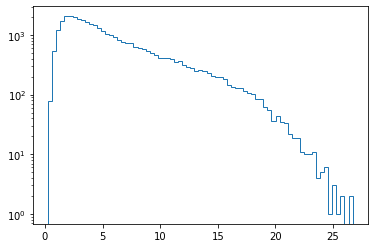

In [13]:
energy_spectrum(final_e, 75)

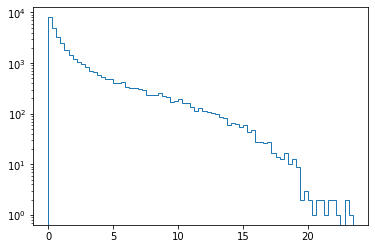

In [14]:
energy_spectrum(final_p, 75)

In [15]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
num = int(0.5*len(xc_test))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for i, x_ in enumerate(xc_test[:num]):
    x_ = np.array([x_])
    classification = model_class.predict(np.stack(x_))
    if classification >= threshold:
        regr_x = np.array([x_[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))
    bar.update(i+1)
bar.finish()

[===============================================================] 100% of 36127


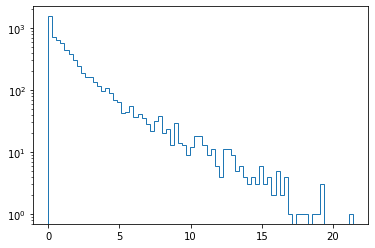

In [16]:
energy_spectrum(photon_final_nn, 75)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


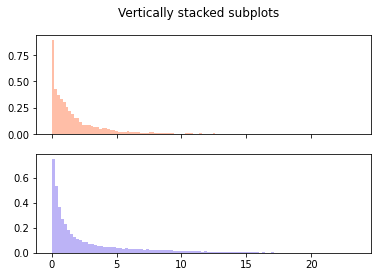

In [17]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(photon_final_nn, 100, alpha=0.5, color = 'coral', label='NN prediction', density = True)
axs[1].hist(final_p, 100, alpha=0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
fig.show()

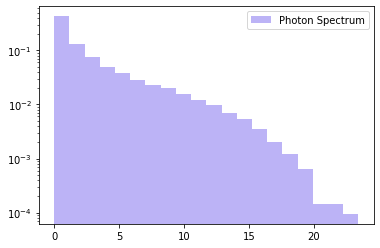

In [21]:
plt.hist(final_p, bins=20, alpha = 0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
plt.yscale('log')
plt.legend(loc='upper right')
plt.savefig('../plots/twonetworks/highene/photonspectrum.png')
plt.savefig('../plots/twonetworks/highene/photonspectrum.png')
plt.show()

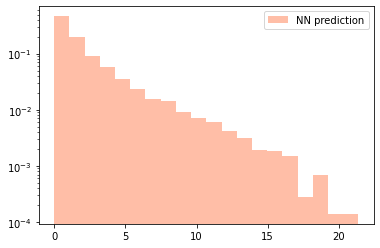

In [22]:
plt.hist(photon_final_nn, bins=20, alpha = 0.5,  color = 'coral', label='NN prediction', density = True)
plt.yscale('log')
plt.legend(loc='upper right')
plt.savefig('../plots/twonetworks/highene/NNprediction.png')
plt.savefig('../plots/twonetworks/highene/NNprediction.pdf')
plt.show()

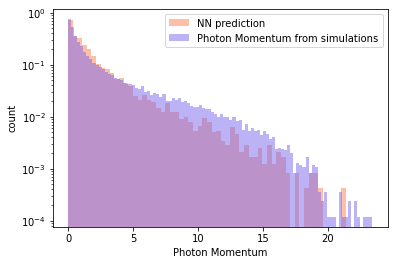

In [23]:
plt.hist(photon_final_nn, 60, alpha=0.5, color = 'coral', label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, color = 'mediumslateblue', label='Photon Momentum from simulations', density = True)
plt.xlabel('Photon Momentum')
plt.yscale('log')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.savefig('../plots/twonetworks/highene/comparison.png')
plt.savefig('../plots/twonetworks/highene/comparison.pdf')
plt.show()